In [21]:
from datasets import load_dataset
import pandas as pd

# dataset = load_dataset("ag_news")
# dataset = load_dataset("glue", "sst2")
# dataset = load_dataset('wikitext', 'wikitext-2-raw-v1')
dataset = load_dataset('imdb')


train_df = pd.DataFrame(dataset['train'])
test_df = pd.DataFrame(dataset['test'])

# train_df.to_csv('ag_news_train.csv', index=False)
# test_df.to_csv('ag_news_test.csv', index=False)
# train_df.to_csv('sst2_train.csv', index=False)
# test_df.to_csv('sst2_test.csv', index=False)
# train_df.to_csv('wikitext_train.csv', index=False)
# test_df.to_csv('wikitext_test.csv', index=False)
train_df.to_csv('imdb_train.csv', index=False)
test_df.to_csv('imdb_test.csv', index=False)



In [22]:
print(dataset['train'].column_names)
print(dataset['train'][0])

['text', 'label']
{'text': 'I rented I AM CURIOUS-YELLOW from my video store because of all the controversy that surrounded it when it was first released in 1967. I also heard that at first it was seized by U.S. customs if it ever tried to enter this country, therefore being a fan of films considered "controversial" I really had to see this for myself.<br /><br />The plot is centered around a young Swedish drama student named Lena who wants to learn everything she can about life. In particular she wants to focus her attentions to making some sort of documentary on what the average Swede thought about certain political issues such as the Vietnam War and race issues in the United States. In between asking politicians and ordinary denizens of Stockholm about their opinions on politics, she has sex with her drama teacher, classmates, and married men.<br /><br />What kills me about I AM CURIOUS-YELLOW is that 40 years ago, this was considered pornographic. Really, the sex and nudity scenes 

In [23]:
import pandas as pd
from collections import Counter

# df = pd.read_csv('ag_news_train.csv')
# df = pd.read_csv('sst2_train.csv')
# df = pd.read_csv('wikitext_train.csv')
df = pd.read_csv('imdb_train.csv')

female_words = ['the woman', 'she', 'the mother', 'the daughter', 'the girl', 'the female', 'the sister', 'the aunt', 'the wife', 'the lady', 'the bride', 'girlfriend', 'the women', 'the girls', 'the mothers', 'the daughters', 'the females', 'the sisters', 'the aunts', 'the wives', 'the ladies', 'the brides', 'the girlfriends']
male_words = ['the man', 'he', 'the father', 'the son', 'the boy', 'the male', 'the brother', 'the uncle', 'the husband', 'the gentleman', 'the groom', 'the boyfriend', 'the men', 'the children', 'the fathers', 'the boys', 'the males', 'the brothers', 'the uncles', 'the husbands', 'the lords', 'the spouses']
nonqueer_words = ['nonqueer']
nonqueer_gender_words = ['cisgender', 'gender conforming']
nonqueer_orientation_words = ['straight', 'heterosexual', 'heteroromantic']
queer_words = ['queer', 'LGBT person', 'LGBTQ person', 'LGBTQI person', 'LGBTQIA person', 'LGBTQIA+ person']
queer_gender_words = [ "non-binary", "enby", "gender non-conforming", "polygender", "agender", "genderless", "genderfluid", "xenogender", "transgender", "transsexual", "trans", "transwoman", "transman", "genderqueer", "pangender", "demigender", "intersexual", "androgynous"]
queer_gender_pronoun_words = ['E', 'They', 'Xe', 'Ze', 'Fae']
queer_gender_xenogender_words = ['catgender']
queer_orientation_words = ['gay', 'lesbian', 'bisexual', 'pansexual', 'homosexual', 'asexual', 'demisexual', 'homoromantic', 'biromantic', 'panromantic', 'aromantic']

category_count = Counter()

for index, row in df.iterrows():
    if pd.notna(row['text']):
        text = row['text'].lower()
        for word in female_words:
            if word in text:
                category_count['female'] += 1
        for word in male_words:
            if word in text:
                category_count['male'] += 1
        for word in nonqueer_words:
            if word in text:
                category_count['nonqueer'] += 1
        for word in nonqueer_gender_words:
            if word in text:
                category_count['nonqueer_gender'] += 1
        for word in nonqueer_orientation_words:
            if word in text:
                category_count['nonqueer_orientation'] += 1
        for word in queer_words:
            if word in text:
                category_count['queer'] += 1
        for word in queer_gender_words:
            if word in text:
                category_count['queer_gender'] += 1
        for word in queer_gender_pronoun_words:
            if word in text:
                category_count['queer_gender_pronoun'] += 1
        for word in queer_gender_xenogender_words:
            if word in text:
                category_count['queer_gender_xenogender'] += 1
        for word in queer_orientation_words:
            if word in text:
                category_count['queer_orientation'] += 1

print(category_count)


Counter({'male': 28189, 'female': 11671, 'queer_gender': 1329, 'nonqueer_orientation': 888, 'queer_orientation': 765, 'queer': 16})


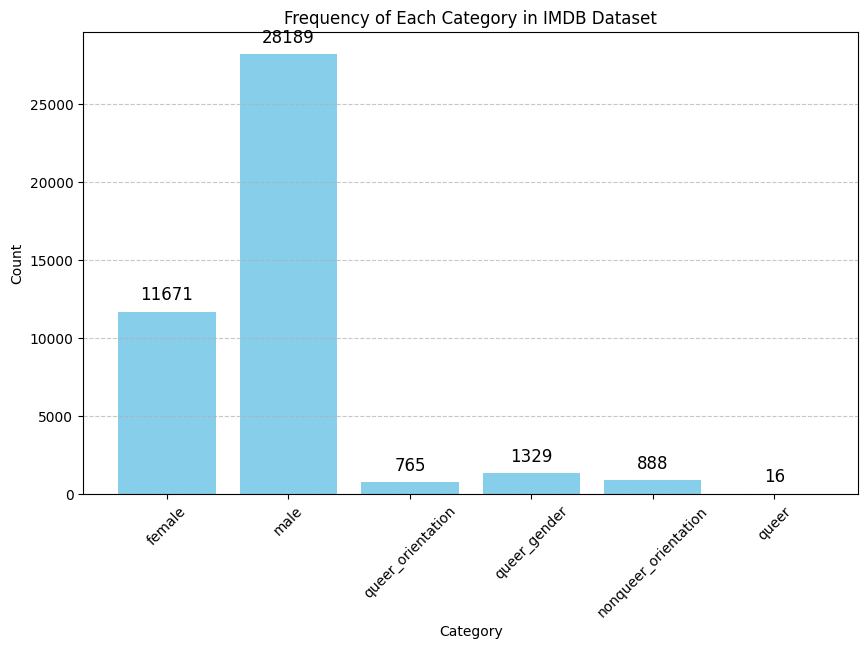

In [24]:
import matplotlib.pyplot as plt

categories = list(category_count.keys())
counts = list(category_count.values())

plt.figure(figsize=(10, 6))
bars=plt.bar(categories, counts, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of Each Category in IMDB Dataset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

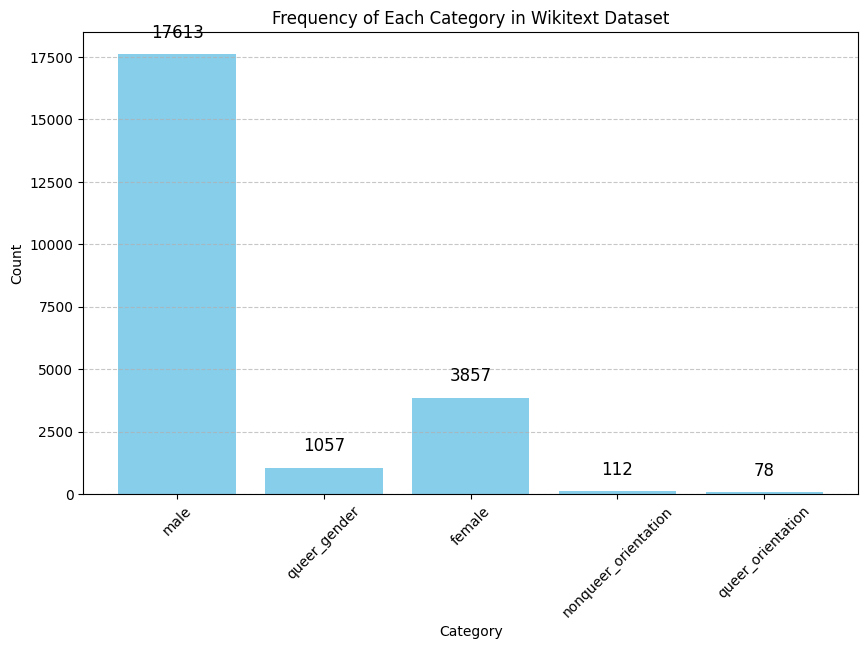

In [20]:
import matplotlib.pyplot as plt

categories = list(category_count.keys())
counts = list(category_count.values())

plt.figure(figsize=(10, 6))
bars=plt.bar(categories, counts, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of Each Category in Wikitext Dataset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

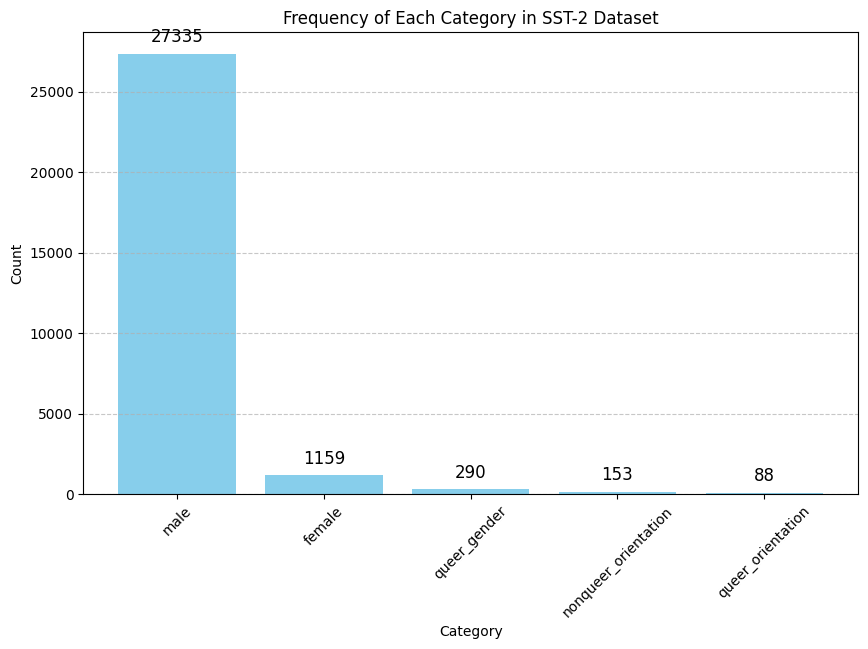

In [18]:
import matplotlib.pyplot as plt

categories = list(category_count.keys())
counts = list(category_count.values())

plt.figure(figsize=(10, 6))
bars=plt.bar(categories, counts, color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of Each Category in SST-2 Dataset')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

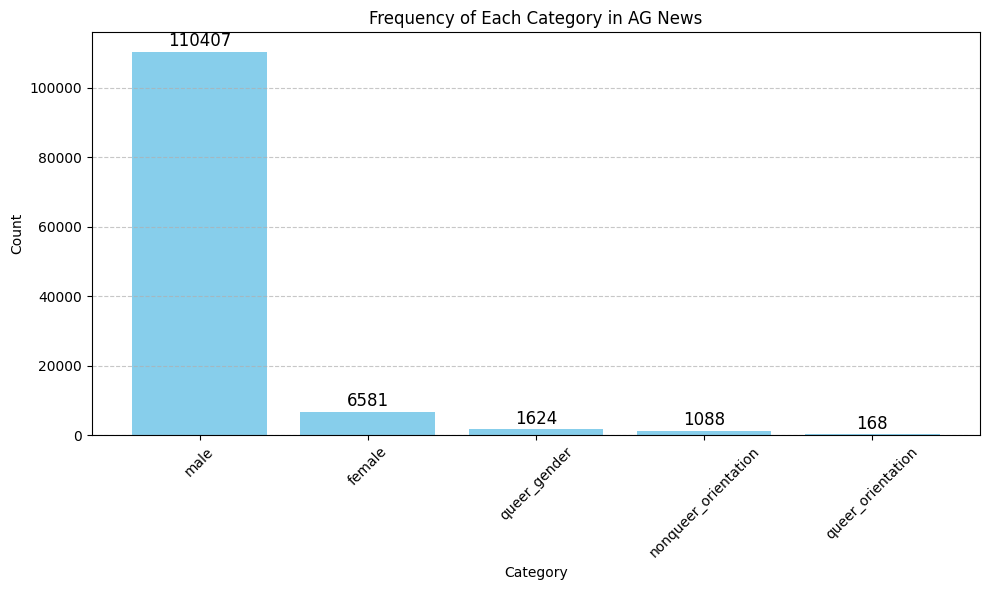

In [15]:
import matplotlib.pyplot as plt
from collections import Counter

# 频率数据
category_count = Counter({
    'male': 110407,
    'female': 6581,
    'queer_gender': 1624,
    'nonqueer_orientation': 1088,
    'queer_orientation': 168
})

# 数据准备
categories = list(category_count.keys())
frequencies = list(category_count.values())

# 清新颜色调色板

# 绘制柱状图
plt.figure(figsize=(10, 6))
bars = plt.bar(categories, frequencies, color="skyblue")

# 添加柱状图的标签
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 500, int(yval), ha='center', va='bottom', fontsize=12, color='black')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Frequency of Each Category in AG News')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 显示图形
plt.tight_layout()
plt.show()
